# Capstone Project : Lung Cancer EDA/Prediction
This project consist of simple statistics.



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


***Finding*** : Preparing the environment to interact with Google Drive in Google Colab

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

***Findings*** : where various libraries are imported

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CapstoneProject/surveylungcancer.csv")

***Findings*** : To read the CSV (Comma-Separated Values) file named "surveylungcancer.csv" from a specific file path

In [ ]:
# Display first five data
df.head().T

,0,1,2,3,4
GENDER,M,M,F,M,F
AGE,69,74,59,63,63
SMOKING,1,2,1,2,1
YELLOW_FINGERS,2,1,1,2,2
ANXIETY,2,1,1,2,1
PEER_PRESSURE,1,1,2,1,1
CHRONIC DISEASE,1,2,1,1,1
FATIGUE,2,2,2,1,1
ALLERGY,1,2,1,1,1
WHEEZING,2,1,2,1,2


***Finding*** : To display the first five rows of the DataFrame df and transpose the result for a more convenient visualization of the data.

In [ ]:
# Display the last 5 data
df.tail().T

,304,305,306,307,308
GENDER,F,M,M,M,M
AGE,56,70,58,67,62
SMOKING,1,2,2,2,1
YELLOW_FINGERS,1,1,1,1,1
ANXIETY,1,1,1,2,1
PEER_PRESSURE,2,1,1,1,2
CHRONIC DISEASE,2,1,1,1,1
FATIGUE,2,2,1,2,2
ALLERGY,1,2,2,2,2
WHEEZING,1,2,2,1,2


***Finding*** : To display the last five rows of the DataFrame df and transpose the result for a more convenient visualization of the data.

In [ ]:
# Display the shape of the DataFrame to show the number of rows and columns
df.shape

(309, 16)

***Findings*** : To determine and display the dimensions of the DataFrame, showing the number of rows and columns it contains. This provides an overview of the dataset's size.

In [ ]:
# Show all the headers
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

***Findings*** : To retrieve and display the column headers (or feature names) of the DataFrame df. This step helps to identify the variables or attributes in the dataset.

In [ ]:
# Calculate and display the number of unique values in each column
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

***Findings*** : To determine and display the count of unique values in each column of the DataFrame df. This provides insights into the diversity of values in each feature or attribute.

In [ ]:
# Display information about the DataFrame, including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

***Findings*** : To provide comprehensive information about the DataFrame df, including the data types of each column, the number of non-null (non-missing) values, and the memory usage. This summary is helpful for understanding the structure and content of the dataset

In [ ]:
# Cheacking for a values in the data
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

***Findings*** : To examine the DataFrame df for missing (null) values in each column and calculate the sum of missing values in each column. This step helps assess the data quality and identify columns with missing data.

In [ ]:
# Counting duplicates
df.duplicated().sum()

33

***Findings*** : To count and display the number of duplicate rows in the DataFrame df. This is useful for identifying and dealing with duplicate records in the dataset.

In [ ]:
# Remove duplicate rows from the DataFrame and display the updated shape
df = df.drop_duplicates()
df.shape

(276, 16)

***Findings*** : To remove duplicate rows from the DataFrame df and then display the updated shape of the DataFrame, showing the number of rows and columns after removing duplicates. This step is performed to ensure data integrity and eliminate redundant records.

In [ ]:
# Generate summarized statistics of the dataset distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,276.0,62.909420,8.379355,21.0,57.75,62.5,69.0,87.0
SMOKING,276.0,1.543478,0.499011,1.0,1.00,2.0,2.0,2.0
YELLOW_FINGERS,276.0,1.576087,0.495075,1.0,1.00,2.0,2.0,2.0
ANXIETY,276.0,1.496377,0.500895,1.0,1.00,1.0,2.0,2.0
PEER_PRESSURE,276.0,1.507246,0.500856,1.0,1.00,2.0,2.0,2.0
CHRONIC DISEASE,276.0,1.521739,0.500435,1.0,1.00,2.0,2.0,2.0
FATIGUE,276.0,1.663043,0.473529,1.0,1.00,2.0,2.0,2.0
ALLERGY,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
WHEEZING,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
ALCOHOL CONSUMING,276.0,1.550725,0.498324,1.0,1.00,2.0,2.0,2.0


***Findings*** : To generate and display summary statistics of the dataset's distribution. The describe() method provides statistics such as count, mean, standard deviation, minimum, and maximum for each numerical column in the DataFrame. Transposing the result with .T makes it easier to read when there are many columns.

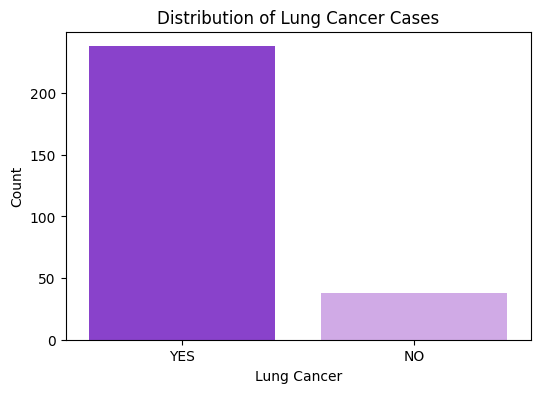

In [ ]:
# Question 1: Distribution of lung cancer cases
custom_palette = {'NO': '#d3a0f0', 'YES': '#8a2be2'}  # The custom palette

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='LUNG_CANCER', palette=custom_palette)  # Use the custom palette
plt.title('Distribution of Lung Cancer Cases')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()


***Finding*** : In the dataset there are more people with lung cancer than without

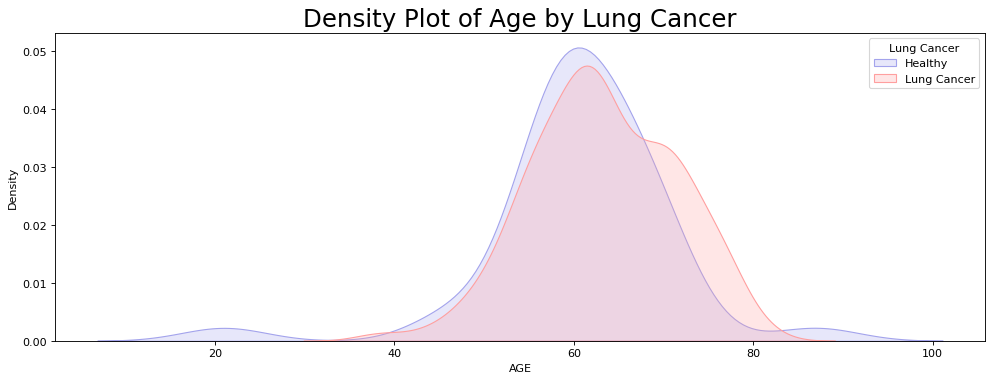

In [ ]:
# Question 2: Age vs. lung cancer
plt.figure(figsize=(15,5),dpi=80)
sns.kdeplot(data=df,x='AGE',hue="LUNG_CANCER",shade=True,common_norm=False,palette=['#ff9f9f','#a3a3ec'])
plt.title('Density Plot of Age by Lung Cancer',fontsize=22)
plt.legend(title='Lung Cancer',loc = 'upper right',labels=['Healthy','Lung Cancer'])
plt.show()



***Findings*** :
*   People who are typically in the age 20 range tend to have healthy lungs.
*   The age ranges between 30 to 90 it can vary whether you have a healthy or unhealthy lungs.


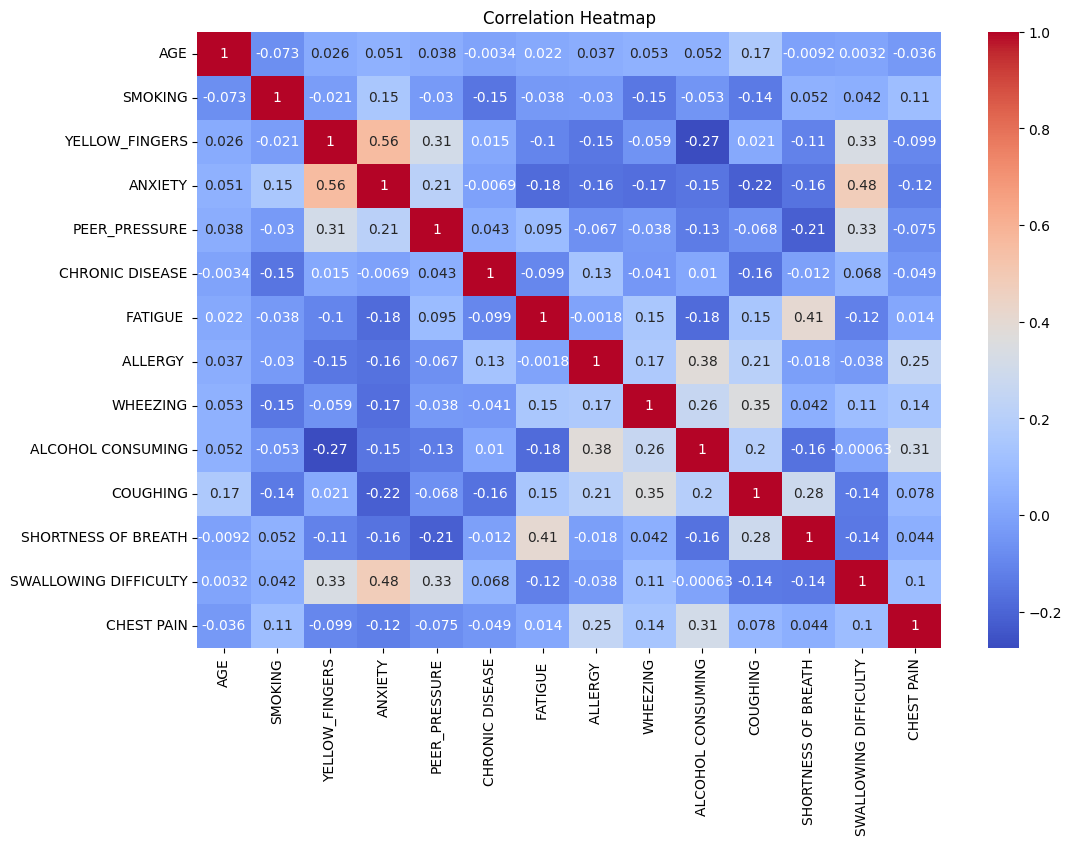

In [ ]:
# Question 3:  Are there any significant correlations between smoking and other attributes with the presence of lung cancer? Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***Findings*** :
*   According to the heat correlation map majourity of the symptons and conditions have no correlation to one another.
*   With the exception of **Anxiety** and **Yellow fingers**.



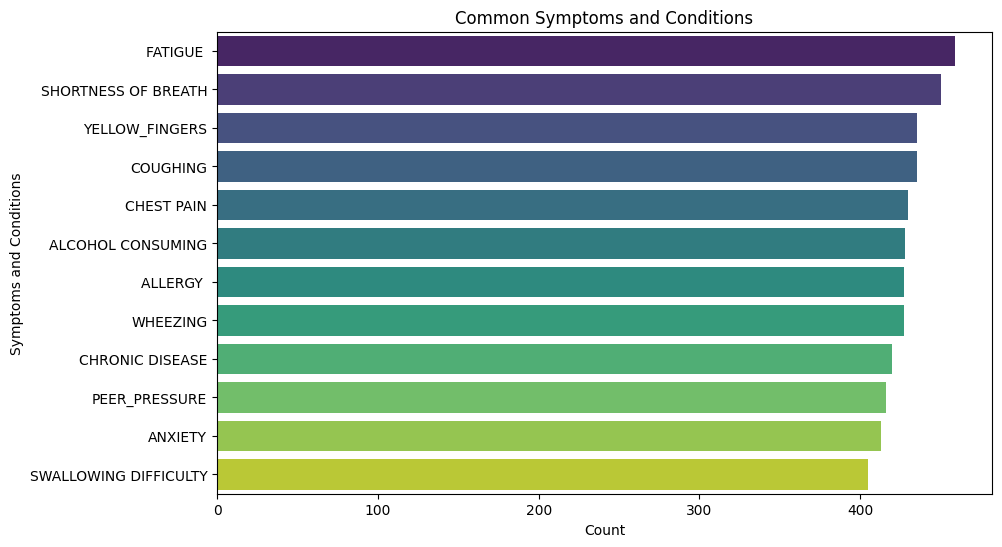

In [ ]:
# Question 4: Common symptoms and conditions
symptoms_columns = df.columns[3:-1]  # Exclude the first three columns (GENDER, AGE, SMOKING)
symptoms_counts = df[symptoms_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=symptoms_counts.values, y=symptoms_counts.index, palette='viridis')
plt.title('Common Symptoms and Conditions')
plt.xlabel('Count')
plt.ylabel('Symptoms and Conditions')
plt.show()

***Finding*** :

*   The most common symptom and condition is **Fatigue** , **Shortness Of Breath** and **Coughing**.
*   The least common symptom and condition is **Peer Pressure** , **Anxiety** and **Swallowing Difficulty**.



***Finding*** :

<Figure size 640x480 with 0 Axes>

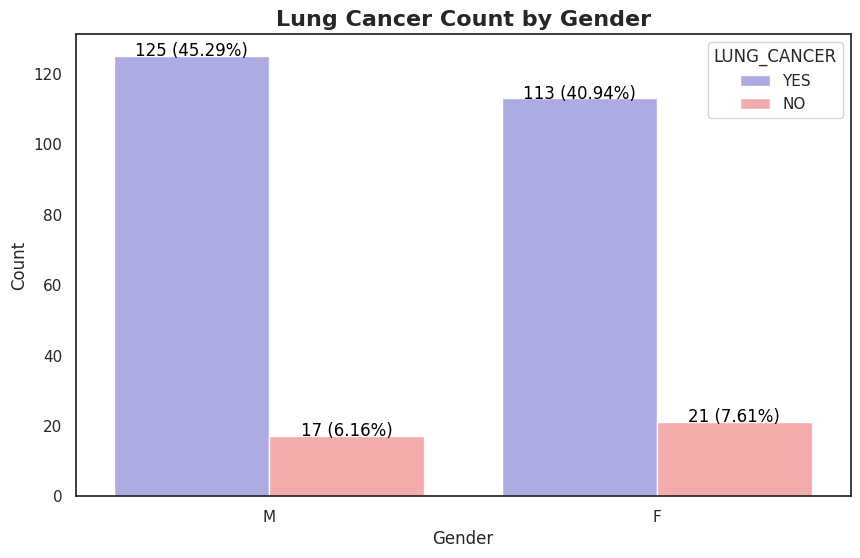

In [ ]:
# Question 5: Does Gender have correlation to lung cancer
df_plot = df.copy()
df_plot['GENDER'] = df_plot['GENDER'].replace({1:"Male",2:"Female"})
df_plot['LUNG_CANCER'] = df_plot['LUNG_CANCER'].replace({0:"No",1:"Yes"})
sns.set(style="whitegrid")
sns.set_style("white")
sns.despine()
palette = [ '#a3a3ec','#ff9f9f']
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_plot, x='GENDER', hue='LUNG_CANCER', palette=palette)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Lung Cancer Count by Gender", fontsize=16, fontweight='bold')

total_counts = len(df)

for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total_counts:.2f}%"
    ax.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.show()

***Findings*** :

*   Gender **does not** have correlation to having or not having lung cancer
*   It shows **46.93%** of men have lung cancer and **40.45%** of women have lung cancer, having a **6.48%** difference.

*   It shows **5.50%** of men **do not have** lung cancer and **7.12%** of women **do not have** lung cancer, having a **2.48%** difference.







In [22]:
# Installing Pandas Profiling module
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.


In [23]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Lung Cancer Survey EDA", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

ImportError: ignored

***Finding*** : The code above creates a profile report of the DataFrame df, which includes various statistics, data summaries, visualizations, and insights about the dataset. The report will be displayed in the notebook as an interactive iframe